# Анализ ассортимента игр магазина "Стримчик"

**Вводная информация о проекте и датасете:** <br>
Описание данных и ТЗ:

Датасет - /datasets/games.csv


**Содержание датасета:** <br>
`Name` — название игры <br>
`Platform` — платформа <br>
`Year_of_Release` — год выпуска <br>
`Genre` — жанр игры <br>
`NA_sales` — продажи в Северной Америке (миллионы проданных копий) <br>
`EU_sales` — продажи в Европе (миллионы проданных копий)<br>
`JP_sales` — продажи в Японии (миллионы проданных копий) <br>
`Other_sales` — продажи в других странах (миллионы проданных копий) <br>
`Critic_Score` — оценка критиков (максимум 100) <br>
`User_Score` — оценка пользователей (максимум 10) <br>
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

ТЗ проекта: <br>
- изучить общую информацию 
- подготовить данные к анализу (регистр, типы, пропуски)
- создать отдельный столбец с суммарными продажами во всех регионах
- провести ИАД:
1. сколько игр выпускалось в разные годы
2. продажи по платформам, распределение по годам
3. определить актуальный период, дальнейший анализ проводить по этим годам
4. лидеры по продажам (платформы)
5. глобальные продажи игр в разбивке по платформам (boxplot)
6. корреляция между отзывами и продажами
7. общее распределение игр по жанрам
- составить портрет пользователя каждого региона по: 
1. популярные платформы (топ-5)
2. популярные жанры (топ-5)
3. влияет ли рейтинг ESRB на продажи в отдельном регионе?
- проверка гипотез:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. средние пользовательские рейтинги жанров Action и Sports разные.
- общий вывод

## Загрузка датасета, получение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

Разделитель стандартный, имена колонок нужно исправлять, присутствуют пропуски, тип данных некоторых столбцов нужно поменять

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет

In [7]:
shape = data.shape[0]

**Изучив вводные, видим, что:**
- имена колонок не в snake_case
- есть пропуски
- не оптимальные типы данных
- явных дубликатов нет 
<br>
После исправления этих пунктов можно будет переходить к исследованиям

## Подготовка данных к анализу

### Имена столбцов

Для начала, заменим названия столбцов

In [8]:
data.columns = ('name', 
                'platform', 
                'year_of_release', 
                'genre', 'na_sales', 
                'eu_sales', 
                'jp_sales', 
                'other_sales', 
                'critic_score', 
                'user_score', 'rating')

In [9]:
display(data.head())
data.dtypes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [10]:
data['critic_score'].unique() #есть ли в столбце с оценками критиков дробные числа

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

### Обработка пропусков и изменение типа данных столбцов

Названия столбцов в порядке, теперь нужно заменить тип данных на int64 в столбцах year_of_release, critic_score, так как это целые числа <br>
<br>
В столбце user_score - во float64. <br>
<br>
tbd можно перевести в NaN, либо заполнить -1, потому что на момент анализа оценка не известна, либо оценки только начали вставлять. Пустующие оценки можно заменить на -1<br>
отсутствуюший рейтинг заменим на unknown

In [11]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В датафрейме есть два пропуска в столбце имени и два пропуска в столбце жанра. **Строки совпали - по ним максимально мало информации, можно их удалить**

In [12]:
data = data[data['name'].isna() != True]

Далее - год релиза. Смотрим отношение количества пропусков к длине датафрейма

In [13]:
print(data['year_of_release'].isna().sum() / shape * 100 )

#строк с пропуском года выпуска мало - 1,6% по всему датафрейму. Эти строки можно удалить

data = data[data['year_of_release'].isna() != True]
data.info() #проверка

1.609332934489979
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
n = data['name'] + data['platform']
print(n[n.duplicated()])
#поиск неявных дубликатов
data.query('name == "Madden NFL 13"') #прошел query по играм NFS, неявный дубликат нашелся в Madden NFL - 16230 строчка
data = data.drop(16230)
data.reset_index(drop=True)
data.shape

1591     Need for Speed: Most WantedX360
11715      Need for Speed: Most WantedPC
16230                   Madden NFL 13PS3
dtype: object


(16443, 11)

In [15]:
#проверим количество строк до обработки и после
len(data) / shape * 100

98.37271911456776

От изначального количества строк осталось 98% - можно проводить актуальный анализ <br>
<br>
Остались пропуски с оценками критиков, пользователей и рейтинг. Рейтинг можно заменить на unknown, остальное заменить на -1, так как мы не можем поставить медианное или среднее значение - это не объективно. Быть может, игра получила хорошие отзывы от критиков, а от игроков плохие и наоборот.<br>
**Удалять эти строки нельзя**, так как в них есть полезная информация. Просто при исследовании, которое касается оценок не будем включать результаты с -1

In [16]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].fillna(-1)
data['rating'] = data['rating'].fillna('unknown')
#теперь можно изменить типы данных столбцов

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int64')
data['critic_score'] = data['critic_score'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

In [18]:
data.info() #проверка типов данных и заполненности 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Создание столбца с общим количеством продаж

In [19]:
data['total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,39.47


**Данные подготовлены к анализу:**
- имена столбцов преведены к snake_case
- в столбцах year_of_release, critic_score, user_score изменены типы данных
- обработаны пропуски, некоторые данные, например с отсутствием года релиза - были удалены
- добавлен столбец с количеством продаж по всем регионам

Датасет после обработки сохранил 98% данных, что говорит нам о том, что можно проводить актуальный анализ

## Исследовательский анализ данных

### Количество релизов за год

<function matplotlib.pyplot.show(close=None, block=None)>

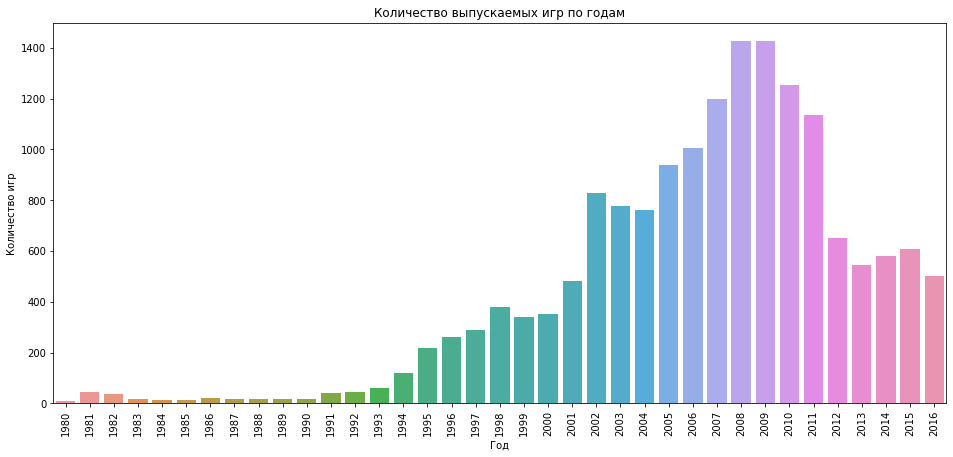

In [20]:
years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(16, 7))
sns.barplot(data=years, x=years.index, y='name')
plt.xticks(rotation=90)
plt.title('Количество выпускаемых игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show

**Вывод:**
- в датафрейме представлены игры с 1980 по 2016 год
- с 1994 года начался рост количества игр, выпущенных за год - до 2008 года, после пошел спад
- с 2012 по 2016 количество новых игр в среднем по 500
Дальнейший анализ можно проводить с играми от 2013 года по 2016. Это более актуальные игры на момент 2016 года (средний цикл "жизни" консоли - 10 лет), так как вышли консоли нового поколения в 2013 и продажи игр на них должны расти, а на консоли предыдущего поколения - падать

### Исследование платформ

In [21]:
platform = data.pivot_table(index='platform', 
                            values=['total', 'year_of_release'], 
                            aggfunc={'total':sum, 'year_of_release':['min', 'max']})
platform.columns = ('total_games', 'max_year', 'min_year')
platform = platform.sort_values(by='total_games', ascending=False)
display(platform.head(10))

,total_games,max_year,min_year
platform,,,
PS2,1043.09,2011,2000
X360,876.36,2016,2005
Wii,813.47,2016,2006
PS3,796.74,2016,2006
DS,743.74,2013,1985
PS,686.89,2003,1994
GBA,305.27,2007,2000
PS4,265.79,2016,2013
PSP,248.77,2015,2004


Итак, после вывода топ-10 консолей с большинством проданных игр, видим топ:
- PS2
- Xbox 360
- Nintendo Wii
- PS3
- Nintendo DS

Далее - из таблицы видно, что по максимальному году выпуска игры на консоль, отличие от минимального составляет примерно 6-10 лет. У консоли Nintendo DS же минимальный год выпуска игры - 1985, но консоль вышла в 2004 году. Поддерживалась консоль до 2013 года. 

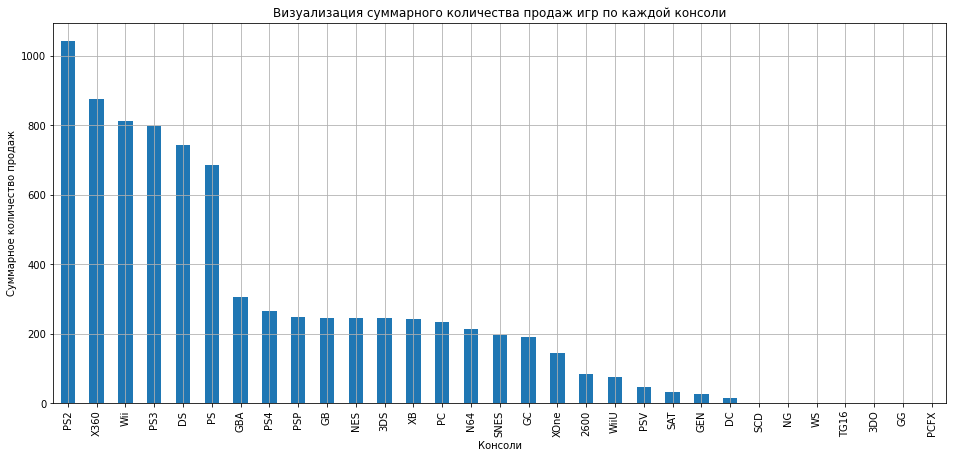

In [22]:
platform['total_games'].plot(kind='bar', figsize=(16, 7), grid=True)
plt.xlabel('Консоли')
plt.ylabel('Суммарное количество продаж')
plt.title('Визуализация суммарного количества продаж игр по каждой консоли')
plt.show()

In [23]:
platform.query('min_year >= 2005')

,total_games,max_year,min_year
platform,,,
X360,876.36,2016,2005
Wii,813.47,2016,2006
PS3,796.74,2016,2006
PS4,265.79,2016,2013
3DS,244.54,2016,2011
XOne,145.05,2016,2013
WiiU,76.24,2016,2012
PSV,47.38,2016,2011


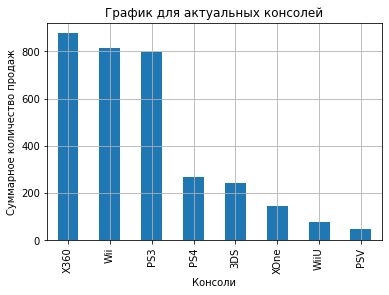

In [24]:
platform.query('min_year >= 2005')['total_games'].plot(kind='bar', figsize=(6, 4), grid=True)
plt.xlabel('Консоли')
plt.ylabel('Суммарное количество продаж')
plt.title('График для актуальных консолей')
plt.show()

Далее - можно подтвердить средний жизненный цикл консолей на примере PlayStation

In [25]:
display(platform.query("platform in 'PS'"))
display(platform.query("platform in 'PS2'"))
display(platform.query("platform in 'PS3'"))
display(platform.query("platform in 'PS4'"))

,total_games,max_year,min_year
platform,,,
PS,686.89,2003,1994


,total_games,max_year,min_year
platform,,,
PS2,1043.09,2011,2000


,total_games,max_year,min_year
platform,,,
PS3,796.74,2016,2006


,total_games,max_year,min_year
platform,,,
PS4,265.79,2016,2013


По этим данным можно предположить, что консоль PS4 будет поддерживаться до 2023-24 года. Консоль нового поколения же выходит ранее завершения поддержки консоли нынешнего поколения. То есть, выход PS5 можно спрогнозировать на 2020 год. - что подтверждается данными википедии, релиз состоялся в ноябре 2020 года. А поддержка PS4 актуальна и на сегодняшний день - май 2024 года

In [26]:
act = ['X360', 'Wii', 'PS3', 'PS4', '3DS', 'XOne', 'WiiU', 'PSV']
data.query('platform in @act').query('year_of_release >= 2015').pivot_table(index='platform', 
                                           values=['eu_sales', 'na_sales', 'jp_sales'], 
                                           aggfunc=sum).sort_values(by='eu_sales', ascending=False)

,eu_sales,jp_sales,na_sales
platform,,,
PS4,83.54,12.05,63.86
XOne,28.10,0.18,50.30
3DS,7.39,23.55,10.31
PS3,7.30,4.97,5.66
WiiU,6.49,4.12,8.86
X360,4.21,0.00,8.05
PSV,1.08,8.41,0.54
Wii,0.73,0.00,0.49


Смотрим по Европейскому рынку: больше всего игр на момент 2015-2016 года продается на консоли PS4 и XBox One - подавляющее большинство рынка, как Европы, так и России. В других регионах ситуация другая. В Америке была очень популярна XBox 360, но с выходом нового поколения консолей - PlayStation немного обогнала XBox. Японский рынок отличается от Европейского и Американского

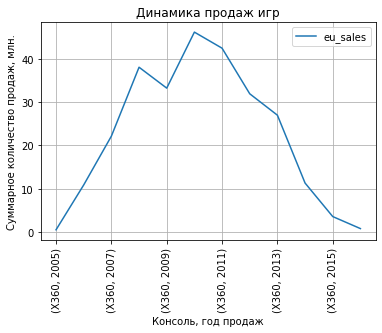

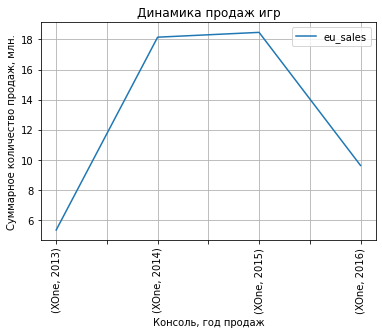

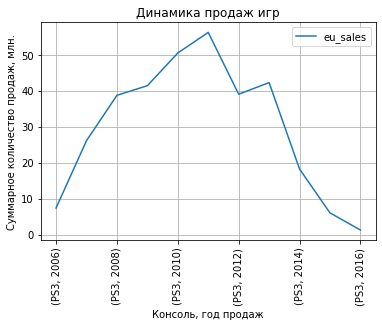

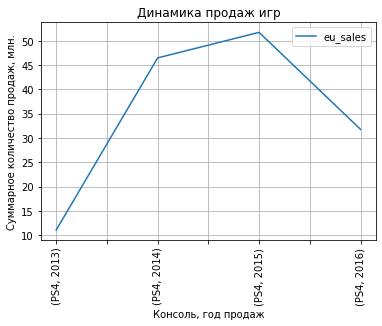

In [27]:
#список с популярными консолями предыдущего (X360, PS3) поколения и нового (XOne, PS4) для оценки динамики продаж
#динамику продаж будем смотреть по евро региону
interested_platforms = ['X360', 'XOne', 'PS3', 'PS4']
for i in interested_platforms:
    a = data.query('platform == @i').pivot_table(index=['platform', 'year_of_release'], values='eu_sales', aggfunc=sum)
    a.plot(figsize=(6, 4), grid=True)
    plt.xlabel('Консоль, год продаж')
    plt.ylabel('Суммарное количество продаж, млн.')
    plt.title('Динамика продаж игр')
    plt.xticks(rotation=90)
    plt.show()

Динамика продаж игр всех консолей падает к 2016 году - значит, что данные за 2016 год не заполнены до конца/2016 еще не закончился на момент сборки датафрейма. Далее - после 2013 года на консолях прошлого поколения наблюдается спад на фоне выхода консолей нового поколения. Топ продаж игр на консолях прошлого поколения - 2010 год, после этого продажи снижаются. На консолях нового поколения с 2013 по 2015 происходит прост продаж. Можно предположить, что после окончания 2016 и дозаполнения датафрейма, 2016 год будет тоже в плюсе у консолей PS4 и Xbox One. 

**Проведя исследование игровых платформ, выяснили:**
- за все время (1980-2016) в топе по суммарному количеству проданных игр консоли PS2, Xbox 360, Nintendo Wii, PS3, Nintendo DS
- актуальные консоли (2016): X360, Wii, PS3, PS4, 3DS, XOne, WiiU, PSV
- средний жизненный цикл консоли - от 7 до 11 лет. Релиз PS5 можно спрогнозировать на 2020, a PS4 будет актуальна еще более 8 лет
- на момент 2015-2016 года в России наиболее актуальны две консоли - PS4 и XBox One. Это подтвердилось как на цифрах продаж в таблице с консолями по играм 2015-16 годов, так и по динамике продаж консолей нового поколения по годам. Ставку нужно делать на игры именно этих платформ (PS4, Xbox One)
Дальнейший анализ будет проведен по актуальным играм, с годом релиза от 2013

### Глобальные продажи по платформам и топовые консоли актуального периода

In [28]:
data_act = data.query('year_of_release >= 2013') 

,total,max,min
platform,,,
PS4,265.79,2016,2013
PS3,154.66,2016,2013
XOne,145.05,2016,2013
3DS,136.97,2016,2013
X360,124.69,2016,2013


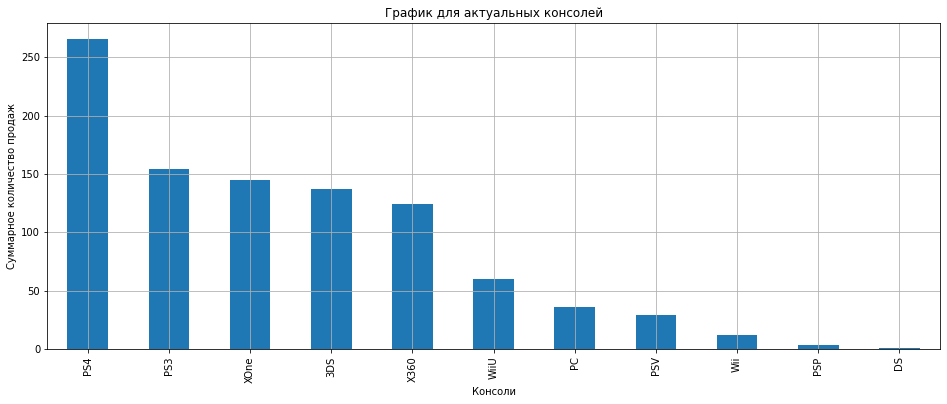

In [29]:
console_act = data_act.pivot_table(index='platform', 
                            values=['total', 'year_of_release'], 
                            aggfunc={'total':'sum', 'year_of_release':['min', 'max']})
console_act.columns = ('total', 'max', 'min')
console_act = console_act.sort_values(by='total', ascending=False)
display(console_act.head())
console_act['total'].plot(kind='bar', figsize=(16, 6), grid=True)
plt.xlabel('Консоли')
plt.ylabel('Суммарное количество продаж')
plt.title('График для актуальных консолей')
plt.show()

В актуальном периоде с 2013 по 2016 год выпуска игр - видим самые популярные консоли - **PS4, PS3, Xbox One, 3DS, Xbox 360**

Text(0.5, 1.0, 'Глобальные продажи игр в разбивке по платформам')

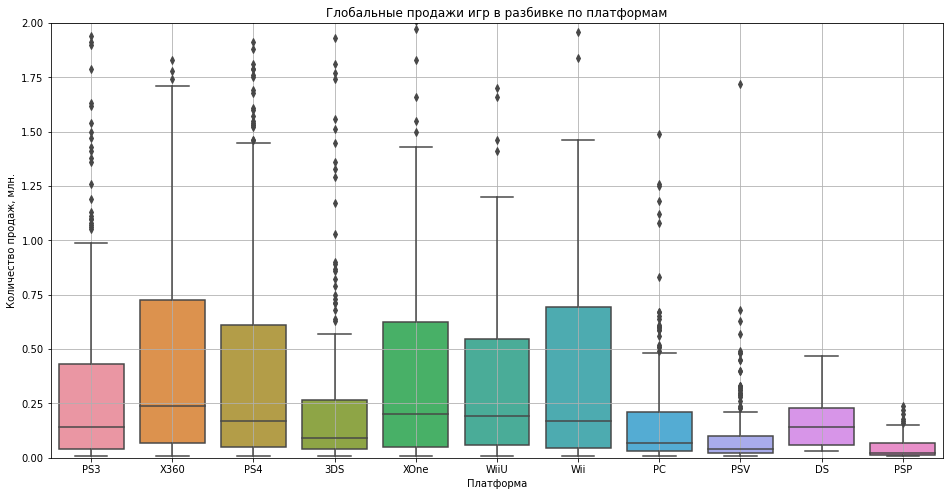

In [30]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=data_act['platform'], y=data_act['total'])
plt.grid(True)
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн.')
plt.title('Глобальные продажи игр в разбивке по платформам')

По графику видим, что медианы продаж игр на популярных консолях приблизительно на 170-250 тыс. копий. В нашем датафрейме данные по множеству игр, популярные тайтлы выходят естественно намного реже - поэтому выбросы по "ящику с усами" начинаются уже с 1-1.5 млн. проданных копий.

### Корреляция между отзывами критиков и геймеров

Возьмем три актуальные консоли - PS4, PS3, Xbox One

Корреляция между продажами и отзывами критиков равна (PS4): 0.226


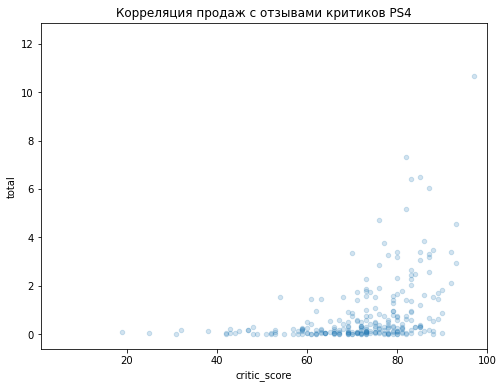

In [56]:
data_act.query('platform in "PS4"').plot(x='critic_score', 
                                                    y ='total', 
                                                    xlim=(1, 100), 
                                                    kind ='scatter', 
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами критиков PS4')
print('Корреляция между продажами и отзывами критиков равна (PS4):',
      data_act.query('platform in "PS4"')['total']
      .corr(data_act.query('platform in "PS4"')['critic_score']).round(3))

Корреляция между продажами и отзывами критиков равна (PS3): 0.282


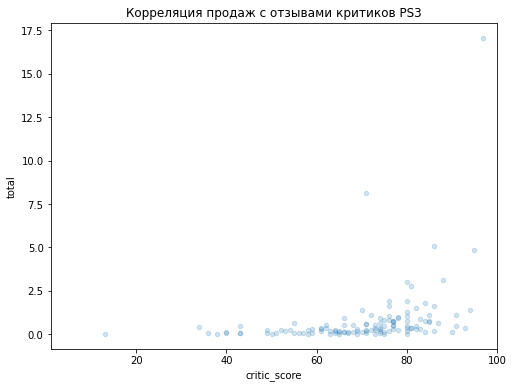

In [57]:
data_act.query('platform in "PS3"').plot(x='critic_score', 
                                                    y ='total', 
                                                    xlim=(1, 100), 
                                                    kind ='scatter', 
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами критиков PS3')
print('Корреляция между продажами и отзывами критиков равна (PS3):',
      data_act.query('platform in "PS3"')['total']
      .corr(data_act.query('platform in "PS3"')['critic_score']).round(3))

Корреляция между продажами и отзывами критиков равна (Xbox One): 0.274


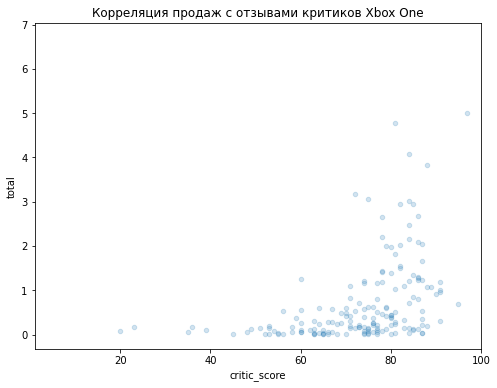

In [58]:
data_act.query('platform in "XOne"').plot(x='critic_score', 
                                                    y ='total', 
                                                    xlim=(1, 100), 
                                                    kind ='scatter', 
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами критиков Xbox One')
print('Корреляция между продажами и отзывами критиков равна (Xbox One):',
      data_act.query('platform in "XOne"')['total']
      .corr(data_act.query('platform in "XOne"')['critic_score']).round(3))

Корреляция положительная, близкая к средней, (больше всего коррелирует PS3, Xbox One) что говорит о том, что зависимость между отзывами критиков (чем выше оценка - тем больше продаж) и продажами игр присутствует, проявляется средне

Корреляция между продажами и отзывами пользователей равна (PS4): 0.115


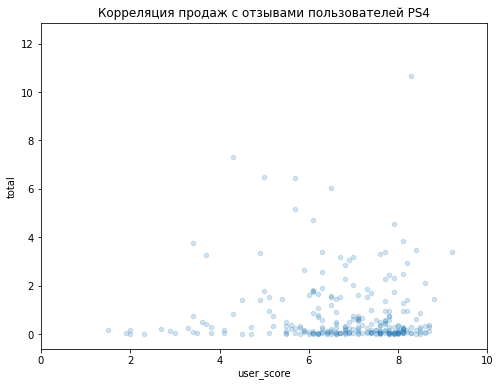

In [59]:
data_act.query('platform in "PS4"').plot(x='user_score',
                                                    y ='total', 
                                                    xlim=(0, 10), 
                                                    kind ='scatter',
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами пользователей PS4')
print('Корреляция между продажами и отзывами пользователей равна (PS4):',
      data_act.query('platform in "PS4"')['total']
      .corr(data_act.query('platform in "PS4"')['user_score']).round(3))

Корреляция между продажами и отзывами пользователей равна (PS3): 0.209


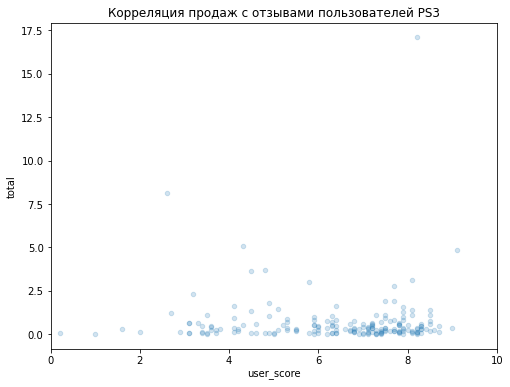

In [60]:
data_act.query('platform in "PS3"').plot(x='user_score',
                                                    y ='total', 
                                                    xlim=(0, 10), 
                                                    kind ='scatter',
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами пользователей PS3')
print('Корреляция между продажами и отзывами пользователей равна (PS3):',
      data_act.query('platform in "PS3"')['total']
      .corr(data_act.query('platform in "PS3"')['user_score']).round(3))

Корреляция между продажами и отзывами пользователей равна (Xbox One): 0.122


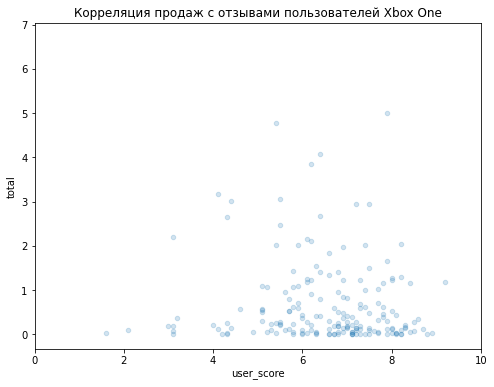

In [61]:
data_act.query('platform in "XOne"').plot(x='user_score',
                                                    y ='total', 
                                                    xlim=(0, 10), 
                                                    kind ='scatter',
                                                    figsize=(8, 6), 
                                                    legend=True, 
                                                    alpha = 0.2)
plt.show
plt.title('Корреляция продаж с отзывами пользователей Xbox One')
print('Корреляция между продажами и отзывами пользователей равна (Xbox One):',
      data_act.query('platform in "XOne"')['total']
      .corr(data_act.query('platform in "XOne"')['user_score']).round(3))

Корреляция положительная, больше всего коррелирует PS3 - 0.209. У остальных консолей (PS4, Xbox One) корреляция между отзывами геймеров и продажами очень слабая 0.11-0.12.

### Жанры игр

,count,total_sell
genre,,
Action,766,284.67
Role-Playing,292,134.41
Adventure,245,21.21
Sports,214,131.20
Shooter,187,204.21
Misc,155,56.73
Racing,85,35.45
Fighting,80,31.75
Platform,74,38.51


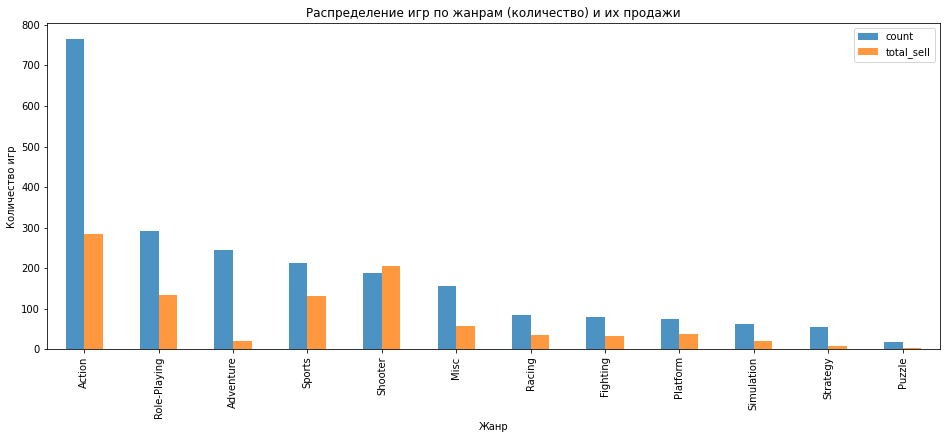

,count,total_sell,top_sell
genre,,,
Adventure,245,21.21,11.551155
Strategy,56,9.27,6.040992
Puzzle,17,3.01,5.647841
Simulation,62,20.30,3.054187
Misc,155,56.73,2.732240
Action,766,284.67,2.690835
Fighting,80,31.75,2.519685
Racing,85,35.45,2.397743
Role-Playing,292,134.41,2.172457


In [33]:
actual_genres = data_act.pivot_table(index='genre',
                     values=['total', 'name'],
                     aggfunc={'total':'sum', 'name':'count'})
actual_genres.columns = ('count', 'total_sell')
display(actual_genres.sort_values(by='count', ascending=False))
actual_genres = actual_genres.sort_values(by='count', ascending=False)
actual_genres.plot(kind='bar', alpha=0.8, figsize=(16, 6), legend=True)
plt.title('Распределение игр по жанрам (количество) и их продажи')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()
actual_genres['top_sell'] = actual_genres['count'] / actual_genres['total_sell']
display(actual_genres.sort_values(by='top_sell', ascending=False))

Больше всего игр жанра action, далее идут жанры RP, Adventure, Sports, Shooter. В конце списка стратегии и пазлы. Игры первых трех жанров составляют почти 50% объема от всех игр. По продажам немного другая картина - в топе Action, Shooter, RP, Sports. По соотношению количества игр к продажам игр этого жанра лидирует Shooter, Strategy, Puzzle, Simulation.


In [34]:
display(data_act.groupby('genre')['total'].median().sort_values(ascending=False))

genre
Shooter         0.410
Sports          0.205
Platform        0.190
Role-Playing    0.120
Fighting        0.115
Action          0.100
Racing          0.100
Simulation      0.095
Misc            0.090
Strategy        0.070
Puzzle          0.060
Adventure       0.030
Name: total, dtype: float64

По медиане продаж, можно сделать вывод, что лучше всего продаются игры жанра Shooter, Sports, Platform, RP, Fightting

**Вывод по исследовательскому анализу датафрейма:**
- в датафрейме представлены игры с 1980 по 2016 год
- с 1994 года начался рост количества игр, выпущенных за год - до 2008 года, после пошел спад
- за все время (1980-2016) в топе по суммарному количеству проданных игр консоли PS2, Xbox 360, Nintendo Wii, PS3, Nintendo DS
- актуальные консоли (2016): PS4, PS3, Xbox One, 3DS, Xbox 360
- средний жизненный цикл консоли - от 7 до 11 лет. 
- на момент 2015-2016 года в России наиболее актуальны две консоли - PS4 и XBox One. Ставку нужно делать на игры именно этих платформ
- медианы продаж игр на популярных консолях приблизительно на 170-250 тыс. копий. В нашем датафрейме данные по множеству игр, популярные тайтлы выходят естественно намного реже - поэтому выбросы по "ящику с усами" начинаются уже с 1-1.5 млн. проданных копий
- корреляция между отзывами критиков и продажами положительная, близкая к средней, (больше всего коррелирует PS3, Xbox One) что говорит о том, что зависимость между отзывами критиков (чем выше оценка - тем больше продаж) и продажами игр присутствует, проявляется средне
- корреляция между отзывами пользователей и продажами положительная, больше всего коррелирует PS3 - 0.209. У остальных консолей (PS4, Xbox One) корреляция между отзывами геймеров и продажами очень слабая 0.11-0.12
- По количеству игр лидируют: Action, RP, Adventure, Sports, Shooter. 
- По количеству продаж лидируют: Action, Shooter, RP, Sports.
- По медиане продаж игр лучше всего продаются игры жанра Shooter, Sports, Platform, RP, Fightting

## Портрет пользователя региона

### Япония

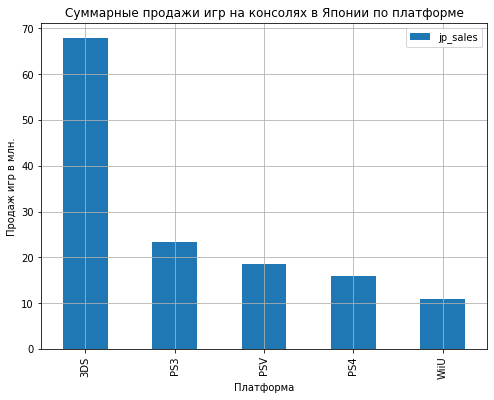

In [35]:
data_act.pivot_table(index='platform', 
                 values='jp_sales', 
                 aggfunc='sum').sort_values(by='jp_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в Японии по платформе')
plt.xlabel('Платформа')
plt.ylabel('Продаж игр в млн.')
plt.show()

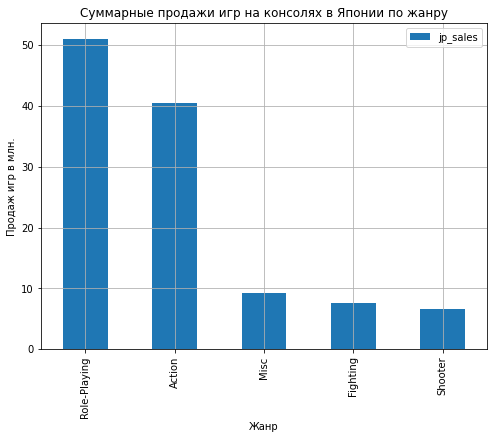

In [36]:
data_act.pivot_table(index='genre', 
                 values='jp_sales', 
                 aggfunc='sum').sort_values(by='jp_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в Японии по жанру')
plt.xlabel('Жанр')
plt.ylabel('Продаж игр в млн.')
plt.show()

Итак, в Японии с играми, вышедшими в 2013 году и позже вырисовывается портрет типичного пользователя: 
- популярная консоль 3DS, консоли от PlayStation (PS4, PSV, PS3), WiiU.
- популярные игровые жанры: Role-Playing, Action - распространены больше всех

### Северная Америка

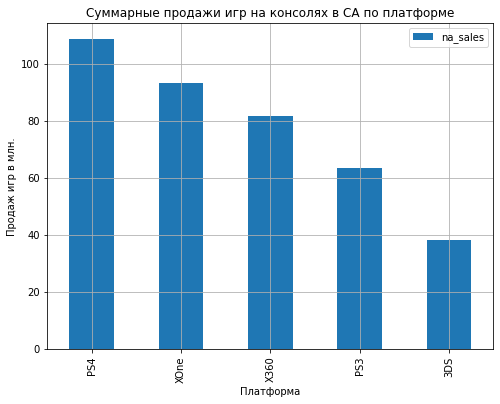

In [37]:
data_act.pivot_table(index='platform', 
                 values='na_sales', 
                 aggfunc='sum').sort_values(by='na_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в СА по платформе')
plt.xlabel('Платформа')
plt.ylabel('Продаж игр в млн.')
plt.show()

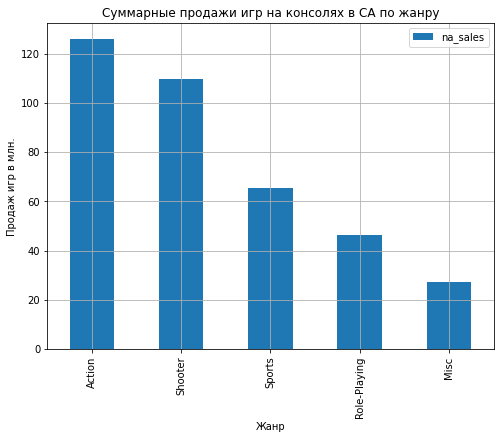

In [38]:
data_act.pivot_table(index='genre', 
                 values='na_sales', 
                 aggfunc='sum').sort_values(by='na_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в СА по жанру')
plt.xlabel('Жанр')
plt.ylabel('Продаж игр в млн.')
plt.show()

Итак, в Северной Америка с играми, вышедшими в 2013 году и позже вырисовывается портрет типичного пользователя: 
- популярные консоли: PS4, XBox One, за ними их предшественники предыдущего поколения, в конце топа - Nintendo 3DS
- популярные игровые жанры: Action, Shooter, Sports, RP, в конце - сборный жанр Misc

### Европа

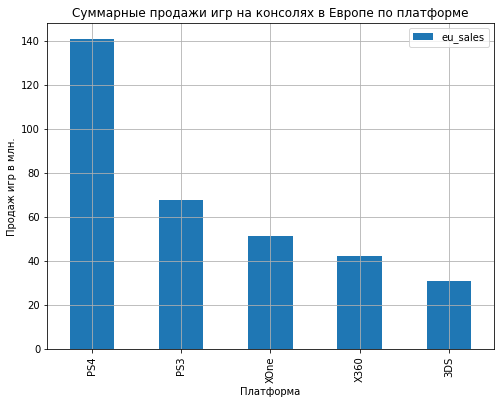

In [39]:
data_act.pivot_table(index='platform', 
                 values='eu_sales', 
                 aggfunc='sum').sort_values(by='eu_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в Европе по платформе')
plt.xlabel('Платформа')
plt.ylabel('Продаж игр в млн.')
plt.show()

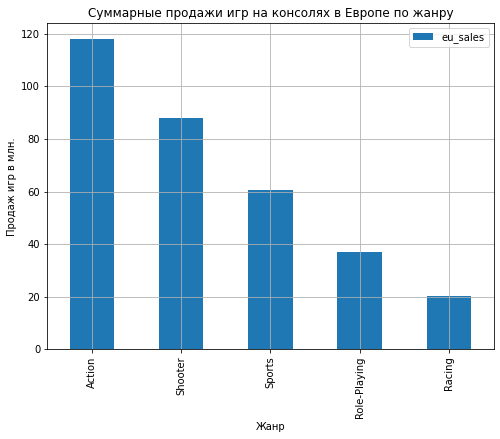

In [40]:
data_act.pivot_table(index='genre', 
                 values='eu_sales', 
                 aggfunc='sum').sort_values(by='eu_sales', 
                                            ascending=False).head(5).plot(kind='bar',
                                                                         grid=True,
                                                                         figsize=(8, 6))
plt.title('Суммарные продажи игр на консолях в Европе по жанру')
plt.xlabel('Жанр')
plt.ylabel('Продаж игр в млн.')
plt.show()

Итак, в Европе с играми, вышедшими в 2013 году и позже вырисовывается портрет типичного пользователя: 
- популярные консоли: две первых строчки за PS4 и PS3, далее консоли XBox - One и 360. В конце топа - Nintendo 3DS
- популярные игровые жанры: Action, Shooter, Sports, RP, почти так же, как в Америке, но последний жанр в топ 5 - Racing

### Оценки рейтинга ESRB в регионах

для начала - расшифровка рейтинга:
- «EC» («Early childhood») — «Для детей младшего возраста».
- «E» («Everyone») — «Для всех».
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет».
- «T» («Teen») — «Подросткам 13–19 лет».
- «M» («Mature») — «От 17 лет».
- «AO» («Adults Only 18+») — «Только для взрослых».
- «RP» («Rating Pending») — «Рейтинг ожидается».

,eu_sales,jp_sales,na_sales
rating,,,
M,145.32,14.11,165.21
E,83.36,15.14,79.05
unknown,78.91,85.05,89.42
E10+,42.69,5.89,54.24
T,41.95,20.59,49.79


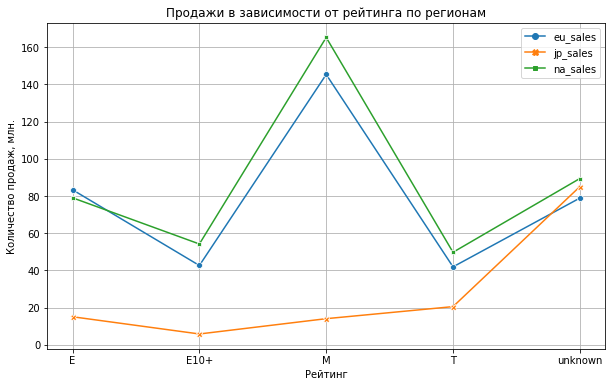

In [41]:
esrb = data_act.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
display(esrb.sort_values(by='eu_sales', ascending=False))
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.lineplot(data=esrb, markers=True, dashes=False)
plt.title('Продажи в зависимости от рейтинга по регионам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж, млн.')
plt.show()

Из сводной таблицы можно сделать вывод, что продажи в зависимости от рейтинга в Европе и Америке почти одинаковы (игры жанра "Для всех" и игры без рейтинга меняются местами на 2 и 3 месте). В Японии же продажи складываются совсем по другому - в топе игры без рейтинга, далее игры "Подросткам 13–19 лет", "Для всех", "От 17 лет", "Для всех старше 10 лет". Если взять рейтинг игр гарантом реального возраста пользователя, то можно сделать вывод, что консолями в Европе и Америке пользуется аудитория старше 17 лет, в консоли любят играть семьями. В Японии же менее возрастная аудитория. 
Причина неизвестного рейтинга в топ 1 по Японии - в Японии другие популярные консоли, много локальных игр, которые популярны только на Японском рынке, деятельность ESRB официально ограничена Канадой, США и Мексикой - они не будут оценивать игры, в которые играют только в Японии.

**Вывод по исследованию портрета пользователя:**
- в Японии
1. популярная консоль 3DS, консоли от PlayStation (PS4, PSV, PS3), WiiU.
2. популярные игровые жанры: Role-Playing, Action - распространены больше всех
3. ESRB: T, E, M, E10+
- в Северной Америке
1. популярные консоли: PS4, XBox One, за ними их предшественники предыдущего поколения, в конце топа - Nintendo 3DS
2. популярные игровые жанры: Action, Shooter, Sports, RP, в конце - сборный жанр Misc
3. ESRB: M, E, E10+, T
- в Европе
1. популярные консоли: две первых строчки за PS4 и PS3, далее консоли XBox - One и 360. В конце топа - Nintendo 3DS
2. популярные игровые жанры: Action, Shooter, Sports, RP, почти так же, как в Америке, но последний жанр в топ 5 - Racing
3. ESRB: M, E, E10+, T
- продажи по рейтингу ESRB в Европе и Америке почти одинаковы. Продажи по рейтингу в Японии в сравнении с Европой/Америкой сильно отличаются. Если взять рейтинг игр гарантом реального возраста пользователя, то можно сделать вывод, что консолями в Европе и Америке пользуется аудитория старше 17 лет, в консоли любят играть семьями. В Японии же менее возрастная аудитория. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем гипотезы:

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны <br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются


In [42]:
XOne = data_act.query('platform == "XOne" & user_score > 0')['user_score']
PC = data_act.query('platform == "PC" & user_score > 0')['user_score']
print(XOne.mean())
print(PC.mean())

6.521428571428572
6.2696774193548395


In [43]:
alpha = 0.05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


При уровне значимости в 5% **не получилось отвергнуть** нулевую гипотезу, значит, можно говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны <br>
H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») различаются

In [44]:
action=data_act.query('genre == "Action" & user_score > 0')['user_score']
sports=data_act.query('genre == "Sports" & user_score > 0')['user_score']
print(action.mean())
print(sports.mean())

6.837532133676092
5.238124999999999


In [45]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-value =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 1.4460039700704315e-20
Отвергаем нулевую гипотезу


При уровне значимости в 5% **получилось отвергнуть** нулевую гипотезу, значит, можно говорить, что дейстивтельно, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверив гипотезы, можно говорить, что:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

## Вывод

Я провел анализ игр по данным 2016 года с целью **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
Изучив датафрейм, была проведена подготовка датасета: **изменены имена столбцов, найдены неявные дубликаты, удалены некоторые данные, заполнены пропуски.** После обработки в датасете осталось 98% данных, был создал столбец с продажами по всем регионам датафрейма

Далее, был проведен исследовательский анализ данных, по итогам которого можно сказать:
- в датафрейме представлены игры с **1980 по 2016 год**
- с 1994 года начался рост количества игр, выпущенных за год - до 2008 года, после пошел спад
<br>
<br>
Дальнейший анализ проводился с играми от **2013 года по 2016.** Это более актуальные игры на момент 2016 года, так как вышли консоли нового поколения в 2013 и продажи игр на них должны расти, а на консоли предыдущего поколения - падать <br> <br> 
Анализ платформ:
- за все время (1980-2016) в топе по суммарному количеству проданных игр консоли PS2, Xbox 360, Nintendo Wii, PS3, Nintendo DS
- актуальные консоли на 2016: **PS4, PS3, Xbox One, 3DS, Xbox 360**
- средний жизненный цикл консоли - **от 7 до 11 лет**
- на момент 2015-2016 года в России наиболее актуальны две консоли - PS4 и XBox One. Это подтвердилось как на цифрах продаж в таблице с консолями по играм 2015-16 годов, так и по динамике продаж консолей нового поколения по годам. **Ставку нужно делать на игры именно этих платформ (PS4, Xbox One)**

Далее были проведены исследования, в ходе которых выяснилось, что:
- корреляция между отзывами критиков и продажами положительная, близкая к средней, (больше всего коррелирует PS3, Xbox One) что говорит о том, что **зависимость между отзывами критиков (чем выше оценка - тем больше продаж) и продажами игр присутствует, проявляется средне**, а корреляция между отзывами пользователей и продажами так же положительна, но едва заметна, (кроме PS3 - 0.209) у PS4, Xbox One корреляция между отзывами геймеров и продажами **очень слабая 0.11-0.12**
- По **количеству игр** лидируют: Action, RP, Adventure, Sports, Shooter. 
- По **количеству продаж** лидируют: Action, Shooter, RP, Sports.
- По **медиане продаж игр** лучше всего продаются игры жанра Shooter, Sports, Platform, RP, Fightting
- медианы продаж игр на популярных консолях приблизительно **на 170-250 тыс. копий.** В нашем датафрейме данные по множеству игр, популярные тайтлы выходят естественно намного реже - поэтому выбросы по "ящику с усами" начинаются уже с 1-1.5 млн. проданных копий.

Составил портрет пользователя каждого региона: 
- в Японии
1. популярная консоль 3DS, консоли от PlayStation (PS4, PSV, PS3), WiiU.
2. популярные игровые жанры: Role-Playing, Action - распространены больше всех
3. ESRB: T, E, M, E10+
- в Северной Америке
1. популярные консоли: PS4, XBox One, за ними их предшественники предыдущего поколения, в конце топа - Nintendo 3DS
2. популярные игровые жанры: Action, Shooter, Sports, RP, в конце - сборный жанр Misc
3. ESRB: M, E, E10+, T
- в Европе
1. популярные консоли: две первых строчки за PS4 и PS3, далее консоли XBox - One и 360. В конце топа - Nintendo 3DS
2. популярные игровые жанры: Action, Shooter, Sports, RP, почти так же, как в Америке, но последний жанр в топ 5 - Racing
3. ESRB: M, E, E10+, T
- продажи по рейтингу ESRB в Европе и Америке почти одинаковы. Продажи по рейтингу в Японии в сравнении с Европой/Америкой сильно отличаются. Если взять рейтинг игр гарантом реального возраста пользователя, то можно сделать вывод, что консолями в Европе и Америке пользуется аудитория старше 17 лет, в консоли любят играть семьями. В Японии же менее возрастная аудитория.

Были проверенны гипотезы, в ходе проверки выяснилось, что действительно, средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**, и средние пользовательские рейтинги жанров Action и Sports **разные**, уровень значимости был выбран 0.05 (5%)

Проанализировав все, можно сказать, что **при планировании кампании для 2017 года магазину игр нужно обратить внимание на консоли PS4, PS3, Xbox One, 3DS, Xbox 360; игры жанра Shooter, Action, Sports, Adventure, RP, Fighting; возрастного рейтинга ESRB - M, E, E10+, также стоит посмотреть на рейтинги критиков - брать высоко оцененные игры**